# The tensile Model

### Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the data

In [2]:
data = pd.read_csv('Processed_concrete_data.csv')
data.head()

,Samples,Cement amount (g),Water (g),Type of cement,Average Aggregate size (mm),Aggregate(Coarse)(g),Aggregate(SAND)(g),Curing Duration (days),Admixtures,Load at Fracture (N),Tensile Strength (MPa)
0,1,701,285,WHITE CEMENT,20,2828,1414,7,Air-Entraining,80534,2.563477
1,2,701,500,OPC,20,2828,1414,7,NaN,73328,2.334103
2,3,701,388,KP Silver,10,2828,1414,7,NaN,55743,1.774355
3,4,701,112,KP Silver,20,2828,1414,7,Air-Entraining,94747,3.015891
4,5,701,140,OPC,20,2828,1414,7,Air-Entraining,55627,1.770662


### DATA PROCESSING

In [3]:
# Summary OF MY DATA
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Samples,81.0,NaN,NaN,NaN,13.641975,7.508843,1.0,8.0,13.0,20.0,27.0
Cement amount (g),81.0,NaN,NaN,NaN,701.0,0.0,701.0,701.0,701.0,701.0,701.0
Water (g),81.0,NaN,NaN,NaN,293.407407,134.055192,111.0,140.0,326.0,423.0,500.0
Type of cement,81,3,OPC,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Average Aggregate size (mm),81.0,NaN,NaN,NaN,11.481481,6.095308,5.0,5.0,10.0,20.0,20.0
Aggregate(Coarse)(g),81.0,NaN,NaN,NaN,2828.0,0.0,2828.0,2828.0,2828.0,2828.0,2828.0
Aggregate(SAND)(g),81.0,NaN,NaN,NaN,1414.0,0.0,1414.0,1414.0,1414.0,1414.0,1414.0
Curing Duration (days),81.0,NaN,NaN,NaN,7.0,0.0,7.0,7.0,7.0,7.0,7.0
Admixtures,54,1,Air-Entraining,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Load at Fracture (N),81.0,NaN,NaN,NaN,79986.518519,15222.361135,51371.0,67070.0,80534.0,97881.0,100605.0


In [4]:
data.isnull().sum()

Samples                         0
Cement amount (g)               0
Water (g)                       0
Type of cement                  0
Average Aggregate size (mm)     0
Aggregate(Coarse)(g)            0
Aggregate(SAND)(g)              0
Curing Duration (days)          0
Admixtures                     27
Load at Fracture (N)            0
Tensile Strength (MPa)          0
dtype: int64

Check if data is normaly distributed

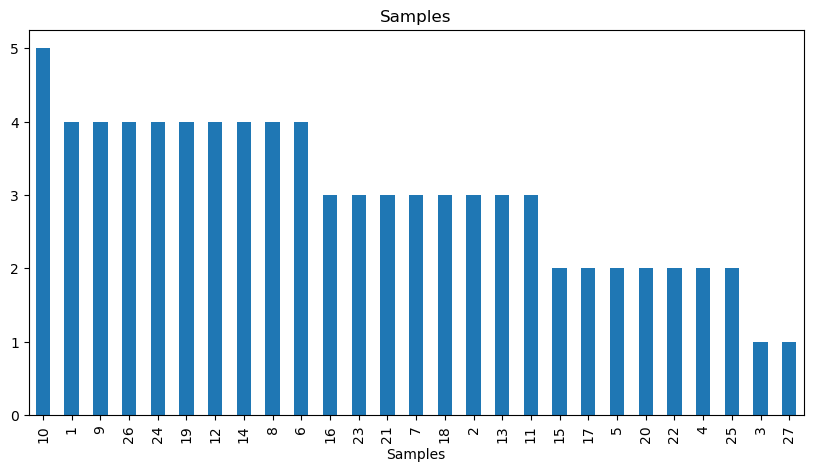

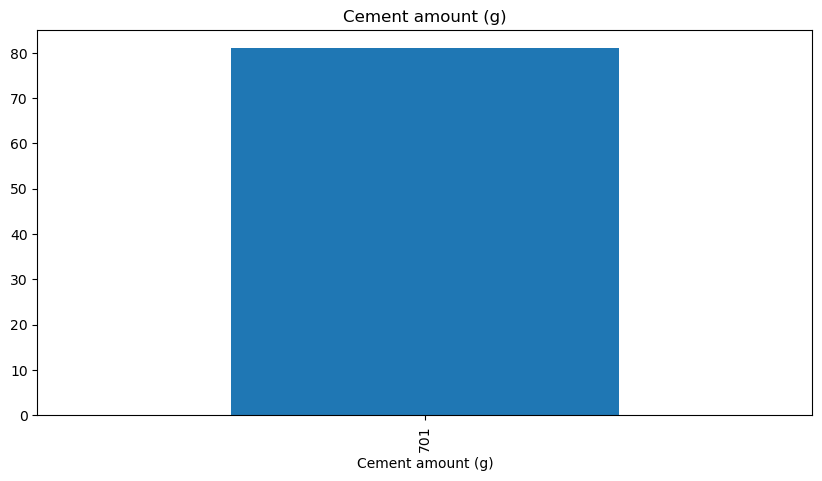

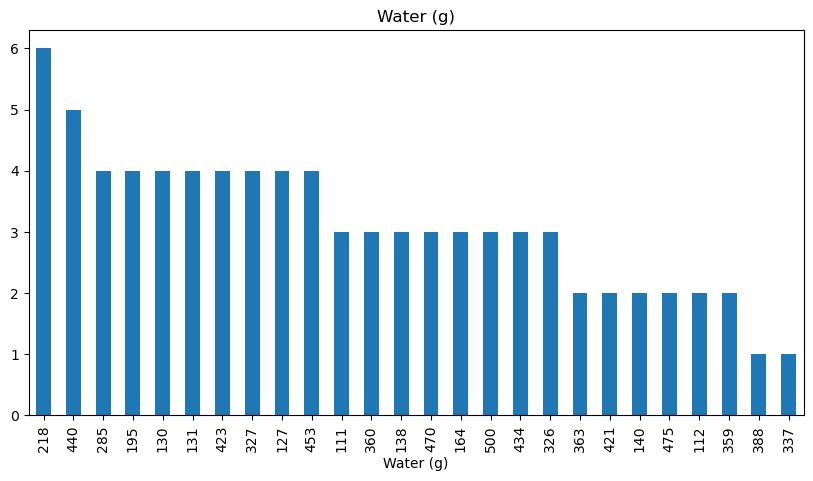

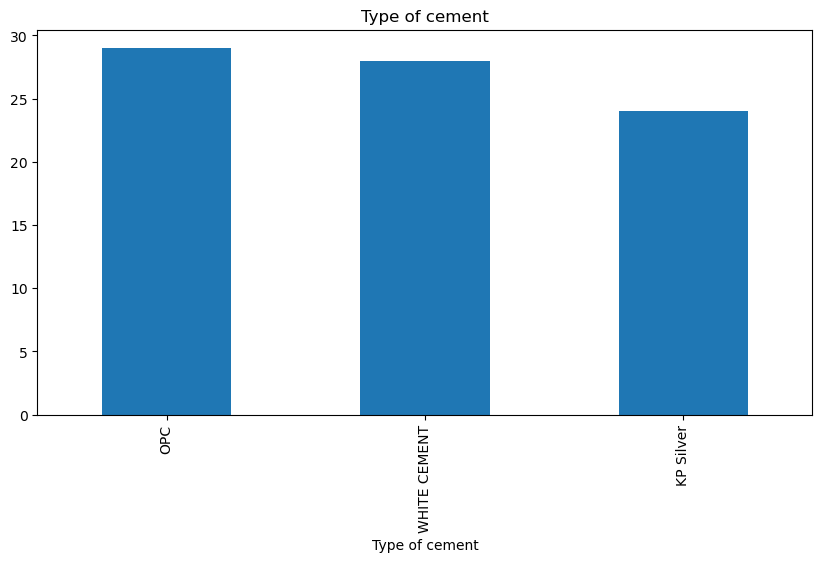

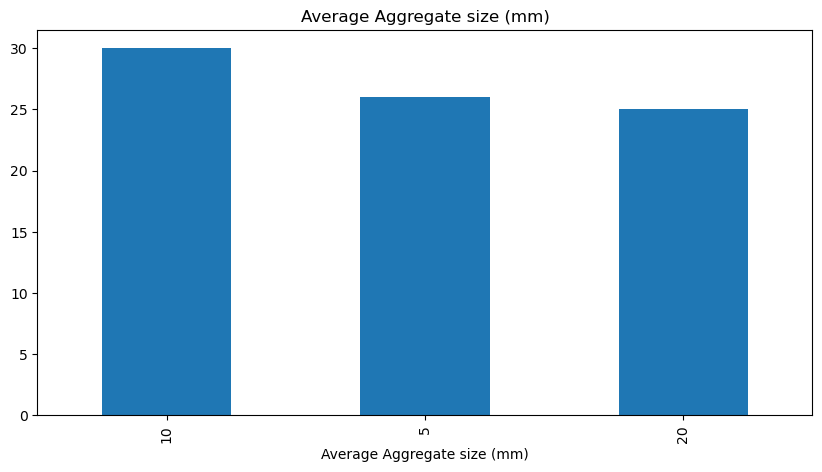

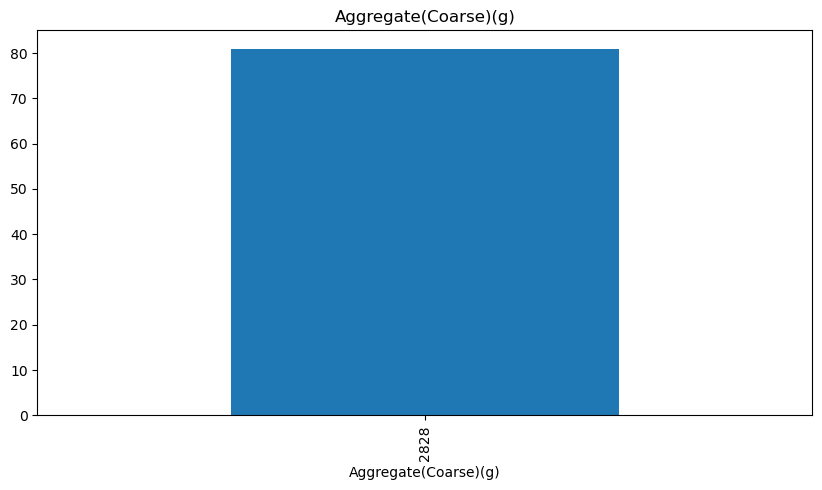

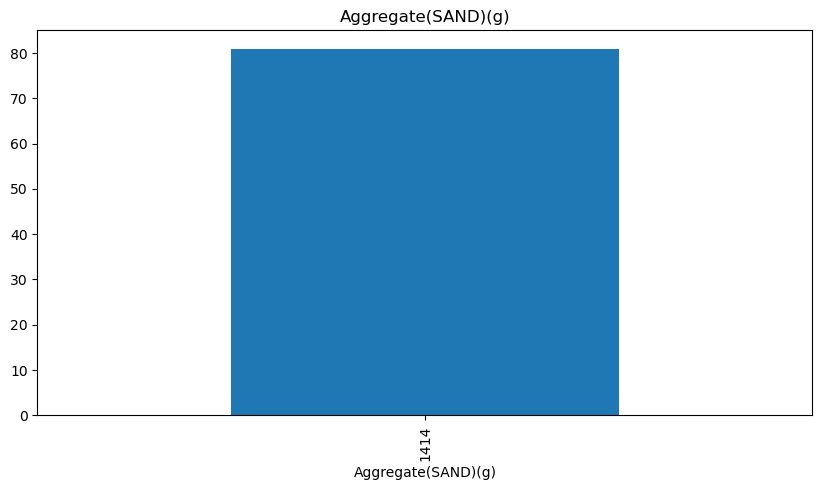

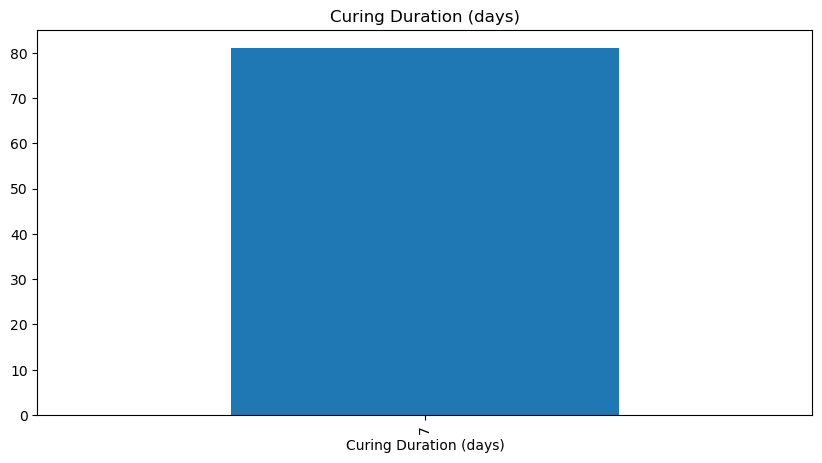

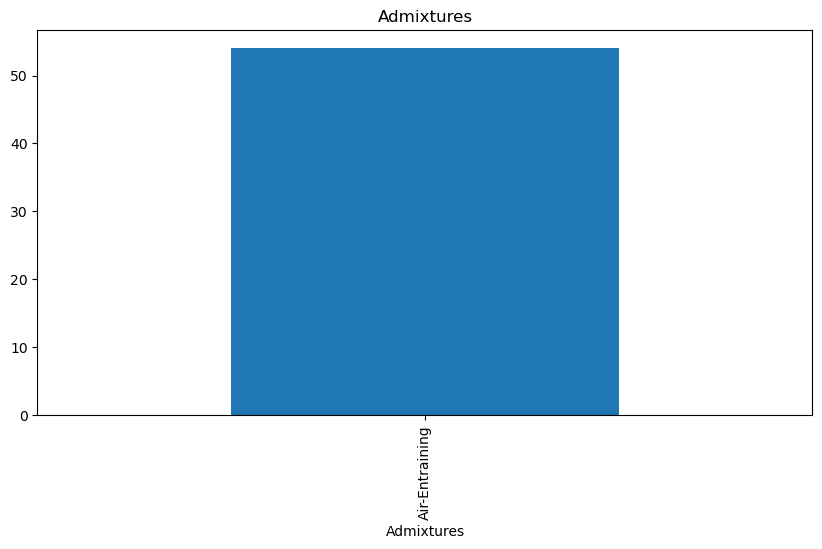

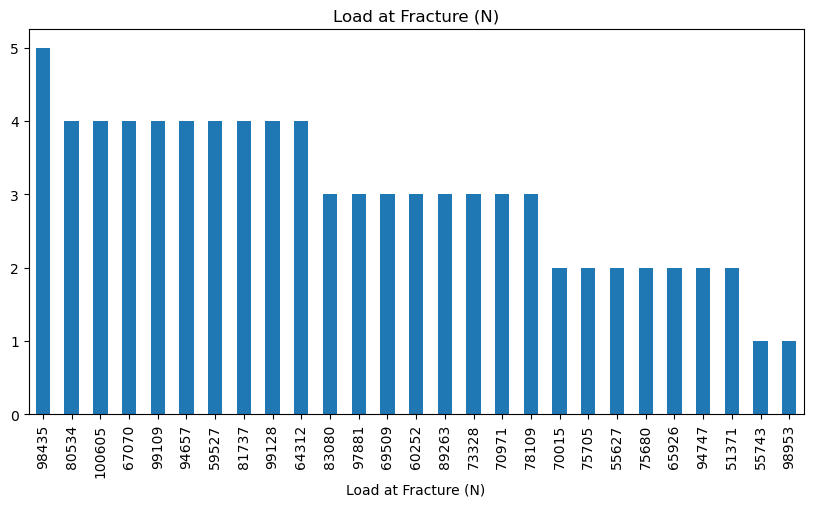

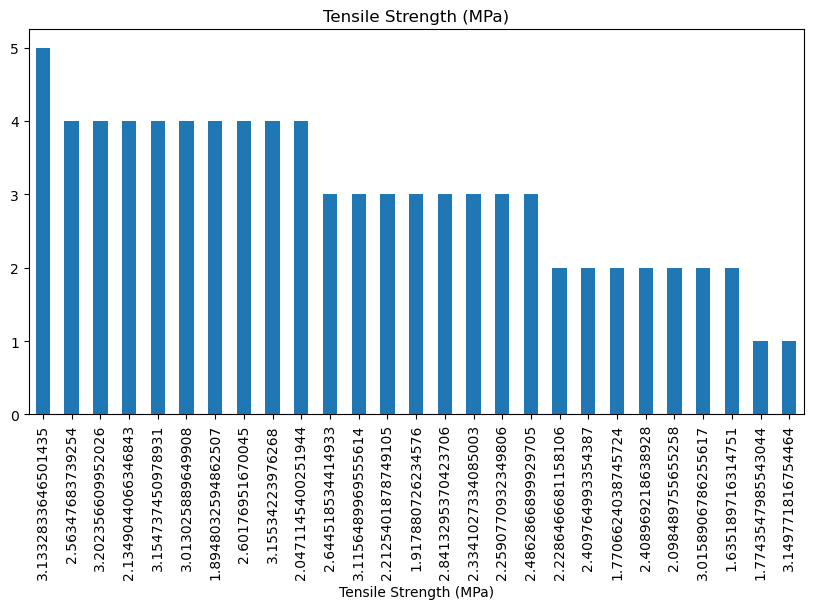

In [5]:
# Create a bar graph for each column
for column in data.columns:
   plt.figure(figsize=(10, 5))  # Adjust as needed
   data[column].value_counts().plot(kind='bar')
   plt.title(column)
   plt.show()

### Converting the Null values in Admixtures.
If no admixture was used WRITE IT to No Admixture

In [6]:
data['Admixtures'] = data['Admixtures'].fillna('No Admixture')
data.isnull().sum()

Samples                        0
Cement amount (g)              0
Water (g)                      0
Type of cement                 0
Average Aggregate size (mm)    0
Aggregate(Coarse)(g)           0
Aggregate(SAND)(g)             0
Curing Duration (days)         0
Admixtures                     0
Load at Fracture (N)           0
Tensile Strength (MPa)         0
dtype: int64

### FEATURE SELECTION
I will do this by removing the columns that I do not need for my model

Like the Samples, Load at Fracture (N)

In [7]:

data = data.drop(["Samples", "Load at Fracture (N)"], axis=1)
data.head()

,Cement amount (g),Water (g),Type of cement,Average Aggregate size (mm),Aggregate(Coarse)(g),Aggregate(SAND)(g),Curing Duration (days),Admixtures,Tensile Strength (MPa)
0,701,285,WHITE CEMENT,20,2828,1414,7,Air-Entraining,2.563477
1,701,500,OPC,20,2828,1414,7,No Admixture,2.334103
2,701,388,KP Silver,10,2828,1414,7,No Admixture,1.774355
3,701,112,KP Silver,20,2828,1414,7,Air-Entraining,3.015891
4,701,140,OPC,20,2828,1414,7,Air-Entraining,1.770662


### ENCODING MY COLUMNS

In [8]:
data.dtypes

Cement amount (g)                int64
Water (g)                        int64
Type of cement                  object
Average Aggregate size (mm)      int64
Aggregate(Coarse)(g)             int64
Aggregate(SAND)(g)               int64
Curing Duration (days)           int64
Admixtures                      object
Tensile Strength (MPa)         float64
dtype: object

## Encoding

In [9]:

data['Type of cement'] = data['Type of cement'].replace({"OPC": 0, "KP Silver": 1, "WHITE CEMENT": 2})
data['Admixtures'] = data['Admixtures'].replace({"Air-Entraining": 0, "No Admixture": 1})
data.head(3)

,Cement amount (g),Water (g),Type of cement,Average Aggregate size (mm),Aggregate(Coarse)(g),Aggregate(SAND)(g),Curing Duration (days),Admixtures,Tensile Strength (MPa)
0,701,285,2,20,2828,1414,7,0,2.563477
1,701,500,0,20,2828,1414,7,1,2.334103
2,701,388,1,10,2828,1414,7,1,1.774355


The data is NOW PERFECT FOR Training my model

# THE PYTORCH MODEL

In [10]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torch import nn, optim
import pandas as pd

In [20]:
from sklearn.preprocessing import StandardScaler
# Assuming df is your DataFrame and that it's already been preprocessed
X = data.drop('Tensile Strength (MPa)', axis=1).values
y = data['Tensile Strength (MPa)'].values

# Initialize a scaler
scaler = StandardScaler()

# Fit on the features and transform
normalized_features = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(normalized_features, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test)



## The Model

In [21]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch import nn, optim
# custom PyTorch model class
class TensileStrength(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(TensileStrength, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


In [22]:
# INITIALIZING THE MODEL
model = TensileStrength(X_train.shape[1], 10, 1)

### Model Achitecture

In [25]:
from torchsummary import summary
summary(model, X_train.shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 64, 10]              90
              ReLU-2               [-1, 64, 10]               0
            Linear-3                [-1, 64, 1]              11
Total params: 101
Trainable params: 101
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


### LOSS FUNCTION AND MODEL OPTIMIZATION

In [23]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-5)

## Training

In [24]:
num_epochs = 50000
# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch+1) % 100 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



c:\Users\Administrator\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [100/50000], Loss: 5.4969
Epoch [200/50000], Loss: 3.8890
Epoch [300/50000], Loss: 2.3073
Epoch [400/50000], Loss: 1.0057
Epoch [500/50000], Loss: 0.5215
Epoch [600/50000], Loss: 0.3903
Epoch [700/50000], Loss: 0.3387
Epoch [800/50000], Loss: 0.3104
Epoch [900/50000], Loss: 0.2911
Epoch [1000/50000], Loss: 0.2781
Epoch [1100/50000], Loss: 0.2684
Epoch [1200/50000], Loss: 0.2620
Epoch [1300/50000], Loss: 0.2573
Epoch [1400/50000], Loss: 0.2536
Epoch [1500/50000], Loss: 0.2512
Epoch [1600/50000], Loss: 0.2494
Epoch [1700/50000], Loss: 0.2479
Epoch [1800/50000], Loss: 0.2465
Epoch [1900/50000], Loss: 0.2452
Epoch [2000/50000], Loss: 0.2438
Epoch [2100/50000], Loss: 0.2428
Epoch [2200/50000], Loss: 0.2419
Epoch [2300/50000], Loss: 0.2411
Epoch [2400/50000], Loss: 0.2403
Epoch [2500/50000], Loss: 0.2396
Epoch [2600/50000], Loss: 0.2389
Epoch [2700/50000], Loss: 0.2383
Epoch [2800/50000], Loss: 0.2378
Epoch [2900/50000], Loss: 0.2373
Epoch [3000/50000], Loss: 0.2369
Epoch [3100/50000],

### Model evaluation

In [26]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    ss_res = torch.sum((y_test - y_pred) ** 2)
    ss_tot = torch.sum((y_test - torch.mean(y_test)) ** 2)
    r2_score = 1 - ss_res/ss_tot
print(f"R-squared: {r2_score.item()}")


R-squared: -16.433565139770508


In [27]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test)
    mse = torch.mean((y_test - y_pred) ** 2)
print(f"Mean Squared Error: {mse.item() * 100} %")


Mean Squared Error: 22.90845811367035 %


### Save the model

In [28]:
# Save the model
torch.save(model, 'Model/copytensile_strength_model.pth')